In [1]:
# pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score


# pip install tensorflow
import tensorflow as tf
import keras
from keras import layers
import keras_tuner

 <h1>I have not studied Data Anylitical course so this dataset is complete new for me</h1>

In [2]:
# I have not studied Data anyaltics course, So, this dataset is completely new for me
# loading the dataset 
df = pd.read_csv("Housing_Prices.csv")

In [3]:
# let's see what we have in the data
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


<p>We can see in the data that we have many yes/no fields and one field with multiple text categories. We have to convert all of these correctly into numeric format.</p>

In [4]:
# quickly check if we have missing values
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
df['grade'].value_counts()

grade
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: count, dtype: int64

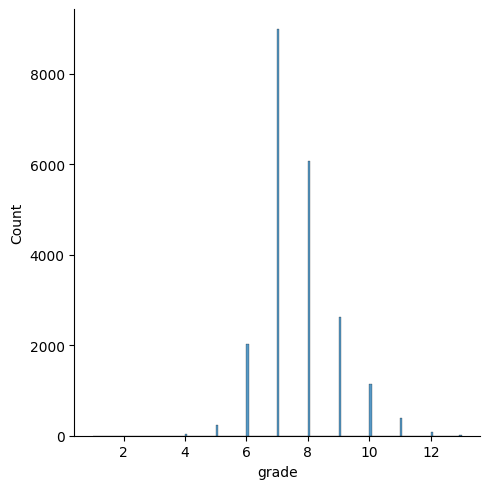

In [7]:
# here i saw the grades, As a close look, I devided the grades, according to amount of data that have, I tried to devide equally, but the problem is, there I saw, 1 to 6 numbers les data, and we have data 7 to 10 more, So I tired to devied in categorories accordingly.
sns.displot(df['grade'])

<h3>Convert no/yes -columns into 0/1</h3>

In [8]:
# Define a function to categorize the 'grade' column
def categorize_grade(grade):
    if grade <= 6:
        return 'Cheap'
    elif grade <= 7:
        return 'Average'
    elif grade <= 9:
        return 'Expensive'
    else:
        return 'Luxury'
    

# Apply the function to create a new target column
df['price_category'] = df['grade'].apply(categorize_grade)

# Verify the new target column
df[['grade', 'price_category']].head()


,grade,price_category
0,7,Average
1,7,Average
2,6,Cheap
3,7,Average
4,8,Expensive


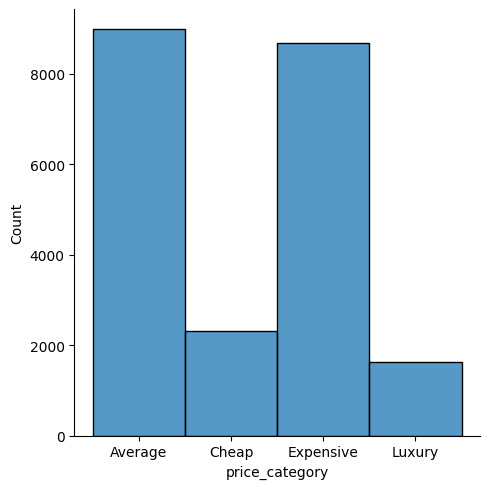

In [9]:
# let us check how price categories are distributed, After distribution we can see average and expensive have much data and other 2 are less.
# So, its effecting our model.
sns.displot(df['price_category'])
# The grades we have created are not normally distributed now which seems like this.

In [10]:
# Grade - Average and Expensive has more data than other 2 grades, So, I remove the data till a limit from these 2.
# let us have sample from it, to get a bit more normal distribution
sub_average_garde = df[df['price_category'] == 'Average']
sub_average_garde = sub_average_garde.sample(5000)

sub_expensive_garde = df[df['price_category'] == 'Expensive']
sub_expensive_garde = sub_expensive_garde.sample(5000)

# let us ignore all Averages from grade
df = df[df['price_category'] != 'Average']
df = df[df['price_category'] != 'Expensive']
# let us combine new sampled Averages with the dataset which does not have Average
df = pd.concat([df, sub_average_garde])
df = pd.concat([df, sub_expensive_garde])
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_category
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,Cheap
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,Luxury
25,1202000200,20141103T000000,233000.0,3,2.00,1710,4697,1.5,0,0,...,1710,0,1941,0,98002,47.3048,-122.218,1030,4705,Cheap
36,9435300030,20140528T000000,550000.0,4,1.00,1660,34848,1.0,0,0,...,930,730,1933,0,98052,47.6621,-122.132,2160,11467,Cheap
44,1432701230,20140729T000000,309000.0,3,1.00,1280,9656,1.0,0,0,...,920,360,1959,0,98058,47.4485,-122.175,1340,8808,Cheap
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13850,2423059060,20150420T000000,838000.0,3,3.75,2930,150945,2.0,0,0,...,2930,0,1972,2000,98058,47.4658,-122.115,2070,43935,Expensive
6188,3904902500,20141219T000000,675000.0,4,2.50,2940,14071,2.0,0,0,...,2940,0,1986,0,98029,47.5627,-122.018,2670,10982,Expensive
14793,4022900150,20141209T000000,600000.0,4,2.50,2520,10850,1.0,0,0,...,1680,840,1968,0,98155,47.7751,-122.284,2590,10800,Expensive
19591,8682261140,20140618T000000,564000.0,2,2.00,1690,4500,1.0,0,0,...,1690,0,2004,0,98053,47.7133,-122.031,1640,4500,Expensive


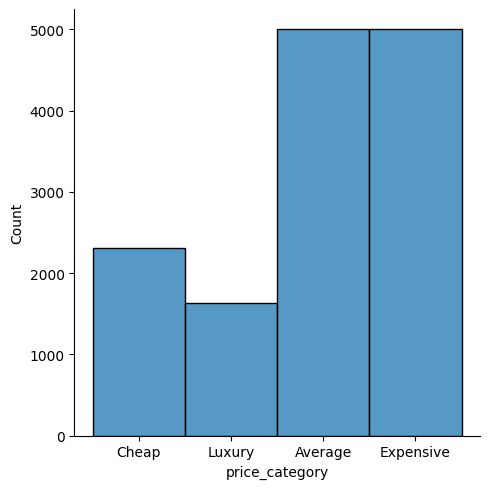

In [11]:
# Now, disturbution of data seems correct which is more likely good for model training.
sns.displot(df['price_category'])

In [12]:
from sklearn.preprocessing import LabelEncoder

# Encode the 'price_category' into numeric values
label_encoder = LabelEncoder()
df['price_category_encoded'] = label_encoder.fit_transform(df['price_category'])
# let us drop the column
df = df.drop('price_category', axis=1)

# Check the mapping of categories to numbers
print(label_encoder.classes_)
df.head()


['Average' 'Cheap' 'Expensive' 'Luxury']


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_category_encoded
2,5631500400,20150225T000000,180000.0,2,1.0,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,1
5,7237550310,20140512T000000,1225000.0,4,4.5,5420,101930,1.0,0,0,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,3
25,1202000200,20141103T000000,233000.0,3,2.0,1710,4697,1.5,0,0,...,1710,0,1941,0,98002,47.3048,-122.218,1030,4705,1
36,9435300030,20140528T000000,550000.0,4,1.0,1660,34848,1.0,0,0,...,930,730,1933,0,98052,47.6621,-122.132,2160,11467,1
44,1432701230,20140729T000000,309000.0,3,1.0,1280,9656,1.0,0,0,...,920,360,1959,0,98058,47.4485,-122.175,1340,8808,1


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,price_category_encoded
price,1.000000,0.337976,0.579483,0.735727,0.096120,0.301377,0.289896,0.425287,0.010538,0.690695,0.650280,0.349693,0.117147,0.115342,0.612772,0.089538,0.532585
bedrooms,0.337976,1.000000,0.538665,0.584604,0.035893,0.229612,0.000119,0.101354,0.021774,0.402829,0.499375,0.312776,0.199024,0.011669,0.414132,0.031047,0.248635
bathrooms,0.579483,0.538665,1.000000,0.789882,0.099150,0.530796,0.073627,0.223720,-0.126375,0.716440,0.723277,0.324818,0.524246,0.046073,0.611345,0.098319,0.536886
sqft_living,0.735727,0.584604,0.789882,1.000000,0.175384,0.409590,0.114876,0.307309,-0.073324,0.799901,0.896342,0.450167,0.366710,0.044864,0.778492,0.185299,0.609440
sqft_lot,0.096120,0.035893,0.099150,0.175384,1.000000,0.010786,0.012457,0.071561,-0.020878,0.119930,0.189747,0.013410,0.062297,0.002369,0.147470,0.693160,0.104503
floors,0.301377,0.229612,0.530796,0.409590,0.010786,1.000000,0.030492,0.055833,-0.252789,0.503436,0.552331,-0.188608,0.497658,0.001433,0.339057,0.002734,0.446412
waterfront,0.289896,0.000119,0.073627,0.114876,0.012457,0.030492,1.000000,0.425056,0.018610,0.090277,0.083797,0.090326,-0.019948,0.091705,0.092402,0.029975,0.075128
view,0.425287,0.101354,0.223720,0.307309,0.071561,0.055833,0.425056,1.000000,0.040969,0.276050,0.198189,0.293954,-0.022546,0.104660,0.297643,0.069893,0.233258
condition,0.010538,0.021774,-0.126375,-0.073324,-0.020878,-0.252789,0.018610,0.040969,1.000000,-0.154213,-0.161408,0.159704,-0.350268,-0.061522,-0.107553,-0.014059,-0.147424
grade,0.690695,0.402829,0.716440,0.799901,0.119930,0.503436,0.090277,0.276050,-0.154213,1.000000,0.793158,0.206673,0.494421,0.009817,0.749350,0.125918,0.760311


<Axes: >

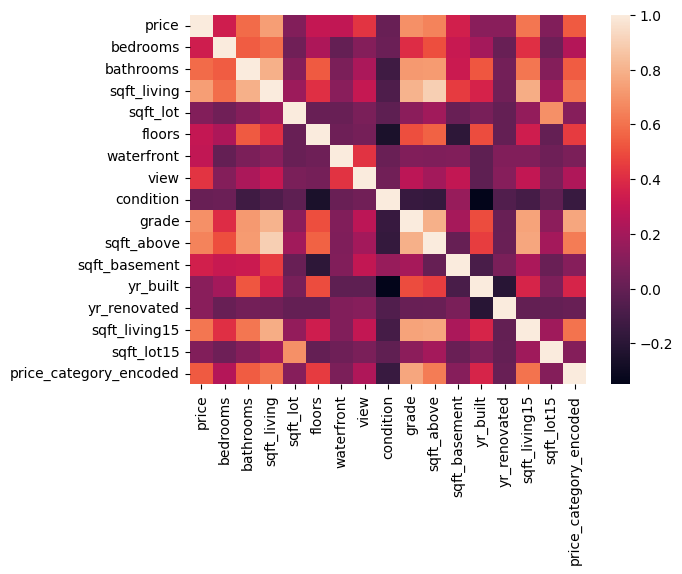

In [13]:
df = df.drop(['id', 'date', 'zipcode', 'lat', 'long'], axis=1)
corr = df.corr(numeric_only=True)
display(corr)
sns.heatmap(corr)

In [14]:
# this just converts the value of column to 0 or 1
# factorize in pandas works too, but only one column at a time
# from sklearn.preprocessing import LabelEncoder
# variables = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
# encoder = LabelEncoder()
# df[variables] = df[variables].apply(encoder.fit_transform)

<h3>Convert text categories with multiple choices into multiple variables</h3>

In [15]:
# when converting a category with multiple options
# into multiple variables, we can always remove the last one of them
# for the optimizations. See the ANN regression materials why this works 
# (the Rovaniemi/Oulu/Helsinki -example)
# df = df.drop(["id", "date",  "sqft_living15",  "waterfront","sqft_lot15", "long", "lat","zipcode"], axis=1)
df = df.drop(["floors","bedrooms"], axis=1)

In [16]:
df["view"].unique()

array([0, 3, 2, 4, 1])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13949 entries, 2 to 8580
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price                   13949 non-null  float64
 1   bathrooms               13949 non-null  float64
 2   sqft_living             13949 non-null  int64  
 3   sqft_lot                13949 non-null  int64  
 4   waterfront              13949 non-null  int64  
 5   view                    13949 non-null  int64  
 6   condition               13949 non-null  int64  
 7   grade                   13949 non-null  int64  
 8   sqft_above              13949 non-null  int64  
 9   sqft_basement           13949 non-null  int64  
 10  yr_built                13949 non-null  int64  
 11  yr_renovated            13949 non-null  int64  
 12  sqft_living15           13949 non-null  int64  
 13  sqft_lot15              13949 non-null  int64  
 14  price_category_encoded  13949 non-null  int6

In [18]:
df.isna().sum()

price                     0
bathrooms                 0
sqft_living               0
sqft_lot                  0
waterfront                0
view                      0
condition                 0
grade                     0
sqft_above                0
sqft_basement             0
yr_built                  0
yr_renovated              0
sqft_living15             0
sqft_lot15                0
price_category_encoded    0
dtype: int64

In [19]:
df.duplicated().sum()
df = df.drop_duplicates()
df.duplicated().sum()

0

In [20]:
# printing out the column names for easier copying for X/y
df.columns

Index(['price', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'sqft_living15', 'sqft_lot15',
       'price_category_encoded'],
      dtype='object')

<h3>X/y -variables</h3>

In [21]:
# # unfortunately the scikit-learn's train_test_split doesn't support validation
# # set split in itself.
# #  split the test set into two for a validation set too, i try this trick:




# # first, train/test split => 70% for training, 30% for other purposes (temp)
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=101)

# # now, split the 30% for other purposes by 50% (resulting in 2 x 15%)
# # so finally, we have:
# # 70% for training
# # 15% for testing
# # 15% for validation
# # => 70 + 15 +15 = 100%
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=101)

In [22]:
# For more than one independent variables, list them all here
# leave out the target variable! (dependent variable)
# in this case, everything else except the amount_paid
X = df[["price", "bathrooms","sqft_living","sqft_lot",
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated',"sqft_living15",  "waterfront","sqft_lot15"]]
# have only the target variable here (dependent variable)
# in this case, amount_paid => how big is the electricity bill
y_temp = df['price_category_encoded']

# since we are doing classification, we have to process our target values with an encoder
# and convert them into a categorical TensorFlow/Keras -format 
# le = LabelEncoder()
# y_enc = le.fit_transform(y_temp)

# Converting the label into a matrix form
y = tf.keras.utils.to_categorical(y_temp)

In [23]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.35)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5)

In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# convert all continuous variables to integer,
# and convert all negative numbers to 0
X_cat = X.astype(int)
X_cat = X_cat.clip(lower=0)

# initialize chi2 and SelectKBest
# Note: chi2 -test is a very common test
# in statistics and quantitative analysis
# basically it studies the data whether variables are related
# or independent of each other
chi_2_features = SelectKBest(chi2, k=len(X_cat.columns))

# fit our data to the SelectKBest
best_features = chi_2_features.fit(X_cat,y.astype(int))

# use decimal format in table print later
pd.options.display.float_format = '{:.2f}'.format

# wrap it up, and show the results
# the higher the score, the more effect that column has on price
df_features = pd.DataFrame(best_features.scores_)
df_columns = pd.DataFrame(X_cat.columns)
f_scores = pd.concat([df_columns,df_features],axis=1)
f_scores.columns = ['Features','Score']
f_scores.sort_values(by='Score',ascending=False)

,Features,Score
0,price,1946736590.78
3,sqft_lot,32644378.50
13,sqft_lot15,16288674.73
2,sqft_living,3982169.48
7,sqft_above,3644422.45
11,sqft_living15,2015994.65
8,sqft_basement,447458.79
10,yr_renovated,4702.70
6,grade,3096.64
4,view,2708.43


<h3>Train/test/validation -split</h3>

In [25]:
# just seeing how much data we have in each
print(f"Train data amount: {len(X_train)}")
print(f"Test data amount: {len(X_test)}")
print(f"Validation data amount: {len(X_val)}")

Train data amount: 9064
Test data amount: 2441
Validation data amount: 2441


<h3>Create neural network structure</h3>

<h1> The best model and layers combination I experiened it </h1>

In [26]:
# save the categories into a list
categories = list(np.unique(df['price_category_encoded']))
print(categories)

[0, 1, 2, 3]


In [27]:
variable_amount = len(X.columns)

model = keras.Sequential(
   [
       layers.BatchNormalization(input_shape=(variable_amount,)),
       layers.Dense(8, activation="relu", kernel_regularizer=keras.regularizers.l1(l1=0.1)),
       layers.Dropout(0.1),
       layers.Dense(8, activation="relu"),
       layers.Dense(len(categories), activation="softmax")
   ]
)

# compile the model, this time we use categorical crossentropy for loss -function
# and we also measure the accuracy of our model in the metrics
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/normalization/batch_normalization.py:143: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 14)             │            56 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 284 (1.11 KB)

 Trainable params: 256 (1.00 KB)

 Non-trainable params: 28 (112.00 B)

<h3>Train the neural network with our data</h3>

In [28]:

# using validation again for better metrics and optimization
model.fit(x=X_train, y=y_train, epochs=800, validation_data=(X_val, y_val))

Epoch 1/800
284/284 ━━━━━━━━━━━━━━━━━━━━ 1s 633us/step - accuracy: 0.3837 - loss: 3.7580 - val_accuracy: 0.4179 - val_loss: 1.9807
Epoch 2/800
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - accuracy: 0.4919 - loss: 1.6713 - val_accuracy: 0.7251 - val_loss: 1.0180
Epoch 3/800
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - accuracy: 0.7060 - loss: 0.9572 - val_accuracy: 0.8878 - val_loss: 0.6072
Epoch 4/800
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 397us/step - accuracy: 0.8498 - loss: 0.6518 - val_accuracy: 1.0000 - val_loss: 0.4027
Epoch 5/800
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - accuracy: 0.8930 - loss: 0.5273 - val_accuracy: 1.0000 - val_loss: 0.3028
Epoch 6/800
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 379us/step - accuracy: 0.8789 - loss: 0.4818 - val_accuracy: 1.0000 - val_loss: 0.2602
Epoch 7/800
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - accuracy: 0.9106 - loss: 0.4156 - val_accuracy: 1.0000 - val_loss: 0.2405
Epoch 8/800
284/284 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - accuracy: 0.9033 - loss: 0

<h3>Training metrics</h3>

<Axes: >

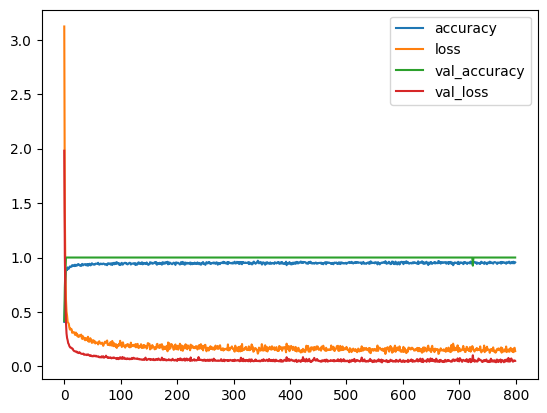

In [29]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

<Axes: >

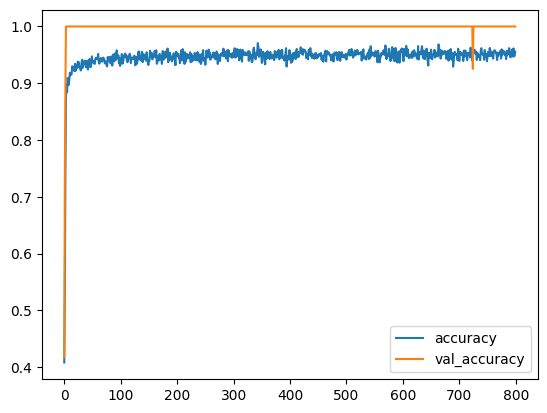

In [30]:
# Plot the accuracy metrics
loss_df[['accuracy', 'val_accuracy']].plot()

In [31]:
# compare test error values to training error values
# the model is often good when these error values are similar
# even if you training metrics above didn't overlap
# you might still get very close values in evaluation => more important

# compare the final model loss/evaluation values
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
[0.0523807518184185, 1.0]

Train data evaluation:
[0.05322542041540146, 1.0]


<h3>Make some test predictions to see what kind of mistakes the model makes</h3>

In [32]:
# get predictions and convert with argmax() to get categories 
# instead of raw probabilities
test_predictions = model.predict(X_test)
test_predictions = np.argmax(test_predictions, axis=1)

# convert also y-test -values with argmax
y_test = np.argmax(y_test, axis=1)

77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step


<Axes: >

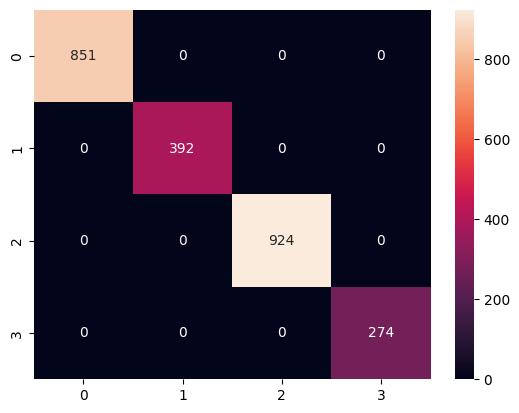

In [33]:
# confusion matrix
sns.heatmap(confusion_matrix(y_test, test_predictions), annot=True, fmt='g')

In [34]:
# print the classification report based on true values and predictions
print(classification_report(y_test, test_predictions))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, test_predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       851
           1       1.00      1.00      1.00       392
           2       1.00      1.00      1.00       924
           3       1.00      1.00      1.00       274

    accuracy                           1.00      2441
   macro avg       1.00      1.00      1.00      2441
weighted avg       1.00      1.00      1.00      2441


Model overall accuracy: 100.00%


In [35]:
# The AUC score is a super sensitive metric
# you often get low scores, even 0.5

# in binary classification, AUC values are often interpreted as follows:
# A binary classifier is useful only when it achieves ROC-AUC score greater than 0.5 and as near to 1 as possible. 
# If a classifier yields a score less than 0.5, it simply means that the model is performing worse 
# than a random classifier, and therefore is useless.

# In multi category classification , AUC values are often interpreted as follows: 
# 0.5-0.6 (failed)
# 0.6-0.7 (worthless)
# 0.7-0.8 (poor)
# 0.8-0.9 (good)
# > 0.9 (excellent)

# get ROC-AUC -score
roc_auc_score(y, model.predict(X), multi_class="ovr")

436/436 ━━━━━━━━━━━━━━━━━━━━ 0s 195us/step


1.0

In [36]:
df.columns

Index(['price', 'bathrooms', 'sqft_living', 'sqft_lot', 'waterfront', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'sqft_living15', 'sqft_lot15',
       'price_category_encoded'],
      dtype='object')

# Test with own data

In [37]:
# let's try with some new imaginary data
# modify this as needed regarding your own dataset
tester_row = {
    'price':180000.00,
    'bathrooms': 1.00,
    'sqft_living': 770,
    'sqft_lot': 10000,
    'waterfront': 0,
    'view': 0,
   'condition': 3,
    'grade': 6,
    'sqft_above': 770,
    'sqft_basement': 0,
    'yr_built': 1983,
    'yr_renovated': 0,
    'sqft_living15': 2720 ,
    'sqft_lot15': 8062
}

# convert to pandas-format
tester_row = pd.DataFrame([tester_row])
result = model.predict(tester_row)[0]
result_text = categories[np.argmax(result)]

# 0 cheapest, 3 most expensive
print("-> 0 cheapest, 3 most expensive category")
print(f"Predicted price range: {result_text}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
-> 0 cheapest, 3 most expensive category
Predicted price range: 1
